<a href="https://colab.research.google.com/github/caceconrad/opticalfibers/blob/main/fibra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para a utilização dos classificadores, é preciso instalar uma versão diferente (mais atualizada) da biblioteca OpenCV (isso é necessário para o algoritmo de SIFT). A primeira parcela do código instala a versão 4.4.0.4, escolhida arbitrariamente.
Além deste package, há a necessidade de alguns outros que também são instalados.

In [ ]:
!pip install opencv-contrib-python==4.4.0.40
!pip install scikit-fuzzy

As parcelas seguintes, respectivamente, montam uma unidade no Google Drive para manipulação das imagens, e importam as bibliotecas necessárias para os descritores de imagem, plot das imagens, manipulação de arquivos e operações matemáticas.

In [ ]:
import cv2 as cv
import keras, os
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.initializers import glorot_uniform
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, MaxPool2D
from keras.models import Sequential, Model, load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam, SGD

from PIL import Image
from google.colab.patches import cv2_imshow as plot
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Data Augmentation**

In [ ]:
def colorChanger(image):
    image = np.array(image)
    image = Image.fromarray((image * 255).astype(np.uint8))
    hsv_image = cv.cvtColor(image,cv.COLOR_RGB2HSV)
    return Image.fromarray(hsv_image)

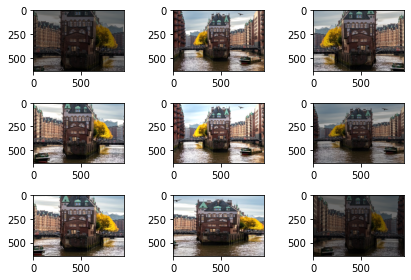

In [ ]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

# load the image
target_dir = "/content/drive/My Drive/Fibras/Augmentation/hamburg.png"
img = cv.imread(cv.samples.findFile(target_dir))
img = cv.cvtColor(cv.imread(cv.samples.findFile(target_dir)), cv.COLOR_RGB2BGR)

# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
#datagen = ImageDataGenerator(zoom_range = [0.5, 1.0], horizontal_flip = True, brightness_range=[0.35,1.5], rotation_range=[45])
datagen = ImageDataGenerator(zoom_range = [0.5, 1.0], horizontal_flip = True, brightness_range=[0.35,1.5])
# prepare iterator
#it = datagen.flow(samples, batch_size=1, save_to_dir="/content/drive/My Drive/Fibras/")
it = datagen.flow(samples, batch_size = 1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.tight_layout()
plt.show()

# As parcelas de código abaixo transformam a imagem da fibra carregada num espaço RGB, com o objetivo de isolar a fibra do fundo da imagem. Para tanto, para cada cor de fibra óptica, há um threshold diferente de espaço RGB.

#**Red Fibers**

In [ ]:
# As fibras vermelhas são as de número 1, 6 e 11.
target_dir = "/content/drive/My Drive/Fibras/fibra11.png"
fibra_vermelha = cv.imread(cv.samples.findFile(target_dir))
fibra = fibra_vermelha

# Create gray version of image
gray = cv.cvtColor(fibra_vermelha, cv.COLOR_BGR2GRAY)

# Convert BGR to HSV
img_hsv = cv.cvtColor(fibra_vermelha, cv.COLOR_BGR2HSV)

# lower mask (0-10)
lower_red = np.array([20, 50, 50])
upper_red = np.array([30, 255, 255])
mask0 = cv.inRange(img_hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([170,80,150])
upper_red = np.array([180,255,255])
mask1 = cv.inRange(img_hsv, lower_red, upper_red)

# join my masks
mask = mask0+mask1

# Bitwise-AND mask and original image
res = cv.bitwise_and(fibra_vermelha, fibra_vermelha, mask = mask)

plot(res)

#**Green Fibers**

In [ ]:
#As fibras verdes são as de número 2, 7 e 12.
target_dir = "/content/drive/My Drive/Fibras/fibra12.png"
fibra_verde = cv.imread(cv.samples.findFile(target_dir))
fibra = fibra_verde

# Create gray version of image
gray = cv.cvtColor(fibra_verde, cv.COLOR_BGR2GRAY)

# Convert BGR to HSV
img_hsv = cv.cvtColor(fibra_verde, cv.COLOR_BGR2HSV)

# define range of green color in HSV
lower_green = np.array([36,25,25])
upper_green = np.array([86,255,255])

# Threshold the HSV image to get only green colors
mask = cv.inRange(img_hsv, lower_green, upper_green)

# Bitwise-AND mask and original image
res = cv.bitwise_and(fibra_verde,fibra_verde, mask= mask)

plot(res)

#**Yellow Fibers**

In [ ]:
#As fibras amarelas são as de número 3, 8 e 13.
target_dir = "/content/drive/My Drive/Fibras/fibra13.png"
fibra_amarela = cv.imread(cv.samples.findFile(target_dir))
fibra = fibra_amarela

# Create gray version of image
gray = cv.cvtColor(fibra_amarela, cv.COLOR_BGR2GRAY)

# Convert BGR to HSV
img_hsv = cv.cvtColor(fibra_amarela, cv.COLOR_BGR2HSV)

# lower mask (0-10)
lower_yellow = np.array([15,10,10])
upper_yellow = np.array([35,255,255])

# Threshold the HSV image to get only yellow colors
mask = cv.inRange(img_hsv, lower_yellow, upper_yellow)

# Bitwise-AND mask and original image
res = cv.bitwise_and(fibra_amarela, fibra_amarela, mask = mask)

plot(res)

#**Blue Fibers**

In [ ]:
#As fibras azuis são as de número 4, 9 e 14.
target_dir = "/content/drive/My Drive/Fibras/fibra14.png"
fibra_azul = cv.imread(cv.samples.findFile(target_dir))
fibra = fibra_azul

# Create gray version of image
gray = cv.cvtColor(fibra_azul, cv.COLOR_BGR2GRAY)

# Convert BGR to HSV
img_hsv = cv.cvtColor(fibra_azul, cv.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_blue = np.array([90,10,10])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv.inRange(img_hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv.bitwise_and(fibra_azul,fibra_azul, mask= mask)

plot(res)

#**White Fibers**

In [ ]:
#As fibras brancas são as de número 5, 10 e 15.
target_dir = "/content/drive/My Drive/Fibras/fibra15.png"
fibra_branca = cv.imread(cv.samples.findFile(target_dir))
fibra = fibra_branca

# Create gray version of image
gray = cv.cvtColor(fibra_branca, cv.COLOR_BGR2GRAY)

# Convert BGR to HSV
img_hsv = cv.cvtColor(fibra_branca, cv.COLOR_BGR2HSV)

# lower mask (0-10)
lower_white = np.array([0,0,0])
upper_white = np.array([180,45,255])

# Threshold the HSV image to get only yellow colors
mask = cv.inRange(img_hsv, lower_white, upper_white)

# Bitwise-AND mask and original image
res = cv.bitwise_and(fibra_branca, fibra_branca, mask = mask)

plot(res)

#A partir daqui, o código está segmentado de acordo com os descritores e/ou filtros utilizados.

#**Median Filter**

In [ ]:
median = cv.medianBlur(res,11)
plot(median)

#cv.imwrite("/content/drive/My Drive/Fibras/median2.jpg",median)

#**Mask**

Otsu Method

In [ ]:
binary = cv.cvtColor(median, cv.COLOR_BGR2GRAY)
ret,binary = cv.threshold(binary,10,255,cv.THRESH_BINARY)

plot(binary)

Opening + closing threshold for noise elimination

In [ ]:
kernel = np.ones((15,15),np.uint8)
erosion = cv.erode(binary,kernel,iterations = 1)

closing = cv.morphologyEx(binary, cv.MORPH_CLOSE, kernel)
opening = cv.morphologyEx(closing, cv.MORPH_OPEN, kernel)

binary_mask = opening


plot(binary_mask)

Mask for grayed fiber

In [ ]:
# Extract the dimensions of the original image
rows, cols, channels = fibra.shape
fibra = fibra[0:rows, 0:cols]

# Bitwise-OR mask and original image
gray_masked = cv.bitwise_or(gray, gray, mask = binary_mask)
gray_masked = gray_masked[0:rows, 0:cols]
gray_masked = cv.cvtColor(gray_masked, cv.COLOR_GRAY2BGR)

plot(gray_masked)

cv.imwrite("/content/drive/My Drive/Fibras/masked15.jpg", gray_masked)

#**Canny Filter**

In [ ]:
canny_img = cv.Canny(gray_masked,100,200)

plot(canny_img)

#cv.imwrite("/content/drive/My Drive/Fibras/canny.jpg",edges)

#**Hough Transform**

Hough Transform

In [ ]:
hough_img = gray_masked.copy()
lines = cv.HoughLines(canny_img,1,np.pi/180, 250)

if lines:
  for line in lines:
      rho,theta = line[0]
      a = np.cos(theta)
      b = np.sin(theta)
      x0 = a*rho
      y0 = b*rho
      x1 = int(x0 + 1000*(-b))
      y1 = int(y0 + 1000*(a))
      x2 = int(x0 - 1000*(-b))
      y2 = int(y0 - 1000*(a))
      cv.line(hough_img,(x1,y1),(x2,y2),(0,255,0),2)

  print(len(lines))
  print(lines)
  plot(hough_img)
else:
  print(0)
  plot(hough_img)
#cv.imwrite('houghlines.jpg', hough_img)

Probabilistic Hough Transform

In [ ]:
hough_img = gray_masked.copy()

lines = cv.HoughLinesP(canny_img, 1, np.pi/180, 100, minLineLength = 100, maxLineGap = 100)

for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(hough_img, (x1, y1),(x2, y2), (0,255,0), 2)

print(len(lines))
plot(hough_img)

# **ORB Detector**

In [ ]:
# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints with ORB
orb_kp = orb.detect(gray_masked,None)

# compute the descriptors with ORB
orb_kp, des = orb.compute(gray_masked, orb_kp)

# draw only keypoints location,not size and orientation
orb_img = cv.drawKeypoints(gray_masked, orb_kp, None, color=(0,255,0), flags=0)

print(len(orb_kp))
plot(orb_img)
#cv.imwrite("/content/drive/My Drive/Fibras/orb_kp.jpg", orb_img)

# **SIFT**


In [ ]:
sift_img = gray_masked.copy()
sift = cv.SIFT_create()
sift_kp = sift.detect(gray_masked, None)
sift_img = cv.drawKeypoints(gray_masked, sift_kp, sift_img)

print(len(sift_kp))
plot(sift_img)
#cv.imwrite('/content/drive/My Drive/Fibras/fibra_sift_keyponts.jpg', sift_img)

# **MSER**

In [ ]:
mser_img = gray_masked.copy()
mser = cv.MSER_create()
regions = mser.detectRegions(gray_masked)
hulls = [cv.convexHull(p.reshape(-1, 1, 2)) for p in regions[0]]
cv.polylines(mser_img, hulls, 1, (0, 255, 0))

print(len(hulls))
#print(hulls)

plot(mser_img)
#cv.imwrite('/content/drive/My Drive/Fibras/fibra_mser.jpg',mser_img)

# O sistema Fuzzy atribui pesos às características anteriores e classifica as fibras entre grupos de "boa", "ruim" e "atenção".

# **Fuzzificação**

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Criando as variáveis do problema
MaxLenght = ctrl.Antecedent(np.arange(-72, 1601, 1), 'MaxLenght')
Distance = ctrl.Antecedent(np.arange(-1, 151, 1), 'Distance')
SIFT = ctrl.Antecedent(np.arange(0, 101, 1), 'SIFT')
Regions = ctrl.Antecedent(np.arange(0, 201, 1), 'Regions')
AxisLenght = ctrl.Antecedent(np.arange(0, 1201, 1), 'AxisLenght')
FiberState = ctrl.Consequent(np.arange(0, 1.1, 0.01), 'FiberState')

# Criando as funções de pertinência para a MaxLenght
MaxLenght['Low'] = fuzz.trimf(MaxLenght.universe, [-71.957671957672, 128.042328042328, 193.042328042328])
MaxLenght['Medium'] = fuzz.trimf(MaxLenght.universe, [205, 412.698412698413, 600])
MaxLenght['High'] = fuzz.trimf(MaxLenght.universe, [600, 900, 1600])

# Criando as funções de pertinência para a Distance
Distance['Right'] = fuzz.trimf(Distance.universe, [130, 140, 150])
Distance['Wrong'] = fuzz.trimf(Distance.universe, [-1, 65, 130])

# Criando as funções de pertinência para a SIFT
SIFT['Low'] = fuzz.trimf(SIFT.universe, [0, 10, 25])
SIFT['Medium'] = fuzz.trimf(SIFT.universe, [25, 33, 40])
SIFT['High'] = fuzz.trimf(SIFT.universe, [40, 80, 100])

# Criando as funções de pertinência para a Regions
Regions['Low'] = fuzz.trimf(Regions.universe, [0.529, 50.5, 119.312169312169])
Regions['High'] = fuzz.trimf(Regions.universe, [120, 150, 200])

# Criando as funções de pertinência para a AxisLenght
AxisLenght['Low'] = fuzz.trimf(AxisLenght.universe, [0, 360, 547.6])
AxisLenght['High'] = fuzz.trimf(AxisLenght.universe, [548.4, 788.4, 1200])

# Criando as funções de pertinência para o FiberState
FiberState['Bad'] = fuzz.trimf(FiberState.universe, [0, 0.15, 0.3])
FiberState['Warning'] = fuzz.trimf(FiberState.universe, [0.3, 0.5, 0.7])
FiberState['Good'] = fuzz.trimf(FiberState.universe, [0.7, 0.85, 1])


#MaxLenght.view()
#Distance.view()
#SIFT.view()
#Regions.view()
#AxisLenght.view()
#FiberState.view()

# **Defuzzificação**

In [ ]:
# Base de Conhecimento/Regras
rule1 = ctrl.Rule(Distance['Right'] & MaxLenght['High'] & SIFT['Low'] & Regions['Low'] & AxisLenght['High'], FiberState['Good'])
rule2 = ctrl.Rule(Distance['Right'] & MaxLenght['Medium'] & SIFT['Low'] & Regions['Low'] & AxisLenght['High'], FiberState['Good'])
rule3 = ctrl.Rule(Distance['Right'] & MaxLenght['Low'] & SIFT['Low'] & Regions['Low'] & AxisLenght['High'], FiberState['Warning'])
rule4 = ctrl.Rule(Distance['Right'] & SIFT['Medium'] & Regions['Low'], FiberState['Warning'])
rule5 = ctrl.Rule(Distance['Right'] & SIFT['Medium'] & Regions['High'], FiberState['Warning'])
rule6 = ctrl.Rule(Distance['Right'] & SIFT['High'], FiberState['Bad'])
rule7 = ctrl.Rule(Distance['Wrong'], FiberState['Bad'])

# Sistema Fuzzy e Simulação
validade_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
validade_simulador = ctrl.ControlSystemSimulation(validade_ctrl)

# Apenas para teste
validade_simulador.input['MaxLenght'] = 900
validade_simulador.input['Distance'] = 140
validade_simulador.input['SIFT'] = 8
validade_simulador.input['Regions'] = 2
validade_simulador.input['AxisLenght'] = 800

# Computando o resultado (Inferência Fuzzy + Defuzzificação)
validade_simulador.compute()

# Visualizando as regiões
FiberState.view(sim=validade_simulador)

# Abaixo, o trabalho com CNNs (Convolutional Neural Networks).

# VGG-16 (Keras)



In [ ]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory = "/content/drive/My Drive/Fibras/Training/", target_size = (224, 224), shuffle = True)
vddata = ImageDataGenerator()
validationdata = trdata.flow_from_directory(directory = "/content/drive/My Drive/Fibras/Validation/", target_size = (224, 224), shuffle = True)
tsdata = ImageDataGenerator()
testdata = trdata.flow_from_directory(directory = "/content/drive/My Drive/Fibras/Testing/", target_size = (224, 224), shuffle = False)
aldata = ImageDataGenerator()
alldata = aldata.flow_from_directory(directory = "/content/drive/My Drive/Fibras/All/", target_size = (224, 224), shuffle = False)

Found 246 images belonging to 2 classes.
Found 62 images belonging to 2 classes.
Found 132 images belonging to 2 classes.
Found 440 images belonging to 2 classes.


In [ ]:
model_vgg = Sequential()
model_vgg.add(Conv2D(input_shape = (224, 224, 3), filters = 64, kernel_size = (3, 3), padding = "same", activation = "relu"))
model_vgg.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", activation = "relu"))
model_vgg.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))
model_vgg.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = "same", activation = "relu"))
model_vgg.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = "same", activation = "relu"))
model_vgg.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))
model_vgg.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
model_vgg.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
model_vgg.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
model_vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_vgg.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model_vgg.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model_vgg.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model_vgg.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))
model_vgg.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model_vgg.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model_vgg.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model_vgg.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))

model_vgg.add(Flatten())
model_vgg.add(Dense(units = 4096, activation = "relu"))
model_vgg.add(Dense(units = 4096, activation = "relu"))
model_vgg.add(Dense(units = 2, activation = "softmax"))

opt = Adam(learning_rate = 0.0001)

model_vgg.compile(optimizer = opt, loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

#model_vgg.summary()

In [ ]:
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor = 'val_accuracy', verbose = 1, save_best_only = True, save_weights_only = False, mode = 'auto')
#early = EarlyStopping(monitor = 'val_accuracy', min_delta = 0, patience = 5, verbose = 1, mode = 'auto')

In [ ]:
#hist = model_vgg.fit_generator(steps_per_epoch = len(traindata), generator = traindata, validation_data = validationdata, validation_steps = len(validationdata), epochs = 30, callbacks = [checkpoint, early])
hist = model_vgg.fit_generator(steps_per_epoch = len(traindata), generator = traindata, validation_data = validationdata, validation_steps = len(validationdata), epochs = 30, callbacks = [checkpoint])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 1.1002 - accuracy: 0.5244
Epoch 1: val_accuracy improved from -inf to 0.59677, saving model to vgg16_1.h5
8/8 [==============================] - 137s 15s/step - loss: 1.1002 - accuracy: 0.5244 - val_loss: 0.6844 - val_accuracy: 0.5968
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.6650 - accuracy: 0.6870
Epoch 2: val_accuracy improved from 0.59677 to 0.64516, saving model to vgg16_1.h5
8/8 [==============================] - 16s 2s/step - loss: 0.6650 - accuracy: 0.6870 - val_loss: 0.6269 - val_accuracy: 0.6452
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.5694 - accuracy: 0.7073
Epoch 3: val_accuracy did not improve from 0.64516
8/8 [==============================] - 9s 1s/step - loss: 0.5694 - accuracy: 0.7073 - val_loss: 0.6132 - val_accuracy: 0.6452
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.5192 - accuracy: 0.7236
Epoch 4: val_accuracy improved from 

Save or load existing model

In [ ]:
model_vgg.save('/content/drive/My Drive/Fibras/VGG/')

In [ ]:
model_vgg = keras.models.load_model('/content/drive/My Drive/Fibras/VGG/')

Model Training History & Confusion Matrix

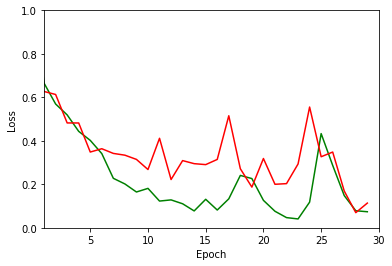

In [ ]:
#plt.plot(hist.history["accuracy"], 'b') #azul
#plt.plot(hist.history['val_accuracy'], 'orange') #laranja
plt.plot(hist.history['loss'], 'g') #verde
plt.plot(hist.history['val_loss'], 'r') #vermelho
#plt.title("Model history")
plt.ylabel("Loss")
plt.xlabel("Epoch")

plt.xlim(1, 30)
plt.ylim(0, 1)

plt.savefig(f"/content/drive/My Drive/Fibras/new-old-boys.png", dpi = 300)
plt.show()

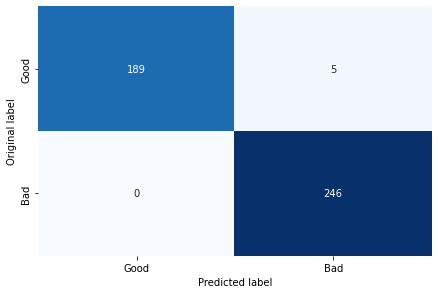

In [ ]:
y_true = alldata.classes
y_pred = model_vgg.predict(alldata, alldata.samples)
y_pred = np.argmax(y_pred, axis = 1)
fiber_classes = ['Good', 'Bad']

condition_1 = (y_true == 0)
condition_2 = (y_true == 1)
condition_3 = (y_pred == 0)
condition_4 = (y_pred == 1)

condition = np.where(condition_1 & condition_3)
arr = [x for xs in condition for x in xs]
a11_vgg = len(arr)

condition = np.where(condition_1 & condition_4)
arr = [x for xs in condition for x in xs]
a12_vgg = len(arr)

condition = np.where(condition_2 & condition_3)
arr = [x for xs in condition for x in xs]
a21_vgg = len(arr)

condition = np.where(condition_2 & condition_4)
arr = [x for xs in condition for x in xs]
a22_vgg = len(arr)

vgg_matrix = [[a11_vgg, a12_vgg], [a21_vgg, a22_vgg]]

df_vgg = pd.DataFrame(vgg_matrix, index = fiber_classes, columns = fiber_classes)

sns.heatmap(df_vgg, annot = True, cmap = plt.cm.Blues, cbar = 0, fmt = ".3g")
plt.tight_layout()
plt.ylabel('Original label')
plt.xlabel('Predicted label')

plt.savefig(f"/content/drive/My Drive/Fibras/new-vgg-matrix-all.png", dpi = 300, bbox_inches = 'tight')
plt.show()

In [ ]:
y_pred = model_vgg.predict(testdata, testdata.samples)

In [ ]:
y_pred

Testing outputs from test data

Ruim


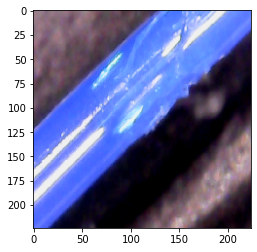

In [ ]:
img = image.load_img("/content/drive/My Drive/Fibras/All/Ruins/fibra (360).png", target_size = (224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
#saved_model = load_model("vgg16_1.h5")
#output = saved_model.predict(img)
output = model_vgg.predict(img)
if output[0][0] > output[0][1]:
    print("Boa")
else:
    print("Ruim")

# ResNet-50 (Keras)

In [ ]:
train_path = "/content/drive/My Drive/Fibras/TrainVal"
test_path = "/content/drive/My Drive/Fibras/Testing"
class_names = os.listdir(train_path)
class_names_test = os.listdir(test_path)

In [ ]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()
all_datagen = ImageDataGenerator()

In [ ]:
train_generator = train_datagen.flow_from_directory("/content/drive/My Drive/Fibras/Training", target_size = (224, 224), batch_size = 32, shuffle = True, class_mode = 'binary')
test_generator = test_datagen.flow_from_directory("/content/drive/My Drive/Fibras/Testing", target_size = (224, 224), batch_size = 32,shuffle = False, class_mode = 'binary')
val_generator = val_datagen.flow_from_directory("/content/drive/My Drive/Fibras/Validation", target_size = (224, 224), batch_size = 32,shuffle = False, class_mode = 'binary')
all_generator = all_datagen.flow_from_directory("/content/drive/My Drive/Fibras/All", target_size = (224, 224), batch_size = 32,shuffle = False, class_mode = 'binary')

Found 246 images belonging to 2 classes.
Found 132 images belonging to 2 classes.
Found 62 images belonging to 2 classes.
Found 440 images belonging to 2 classes.


In [ ]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s = 2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (s, s), padding = 'valid', name=conv_name_base + '2a', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s, s), padding = 'valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed = 0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [ ]:
def ResNet50(input_shape = (224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides = (2, 2))(X)

    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block = 'a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], stage = 2, block = 'b')
    X = identity_block(X, 3, [64, 64, 256], stage = 2, block = 'c')


    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block = 'a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage = 3, block = 'b')
    X = identity_block(X, 3, [128, 128, 512], stage = 3, block = 'c')
    X = identity_block(X, 3, [128, 128, 512], stage = 3, block = 'd')

    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block = 'a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage = 4, block = 'b')
    X = identity_block(X, 3, [256, 256, 1024], stage = 4, block = 'c')
    X = identity_block(X, 3, [256, 256, 1024], stage = 4, block = 'd')
    X = identity_block(X, 3, [256, 256, 1024], stage = 4, block = 'e')
    X = identity_block(X, 3, [256, 256, 1024], stage = 4, block = 'f')

    X = X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block = 'a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage = 5, block = 'b')
    X = identity_block(X, 3, [512, 512, 2048], stage = 5, block = 'c')

    X = AveragePooling2D(pool_size = (2, 2), padding = 'same')(X)
    
    model_resnet50 = Model(inputs = X_input, outputs = X, name = 'ResNet50')

    return model_resnet50

In [ ]:
base_model = ResNet50(input_shape = (224, 224, 3))

In [ ]:
headModel = base_model.output
headModel = Flatten()(headModel)
headModel = Dense(256, activation = 'relu', name = 'fc1', kernel_initializer=glorot_uniform(seed = 0))(headModel)
headModel = Dense(128, activation = 'relu', name = 'fc2', kernel_initializer=glorot_uniform(seed = 0))(headModel)
headModel = Dense(1, activation = 'sigmoid', name = 'fc3', kernel_initializer=glorot_uniform(seed = 0))(headModel)

In [ ]:
model_resnet50 = Model(inputs = base_model.input, outputs = headModel)

In [ ]:
base_model.load_weights("/content/drive/My Drive/Fibras/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5")

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
opt = SGD(learning_rate = 0.0001)

es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 20)
mc = ModelCheckpoint('/content/drive/My Drive/Fibras/best_model.h5', monitor = 'val_accuracy', verbose = 1, save_best_only = True, save_weights_only = False, mode = 'auto')

model_resnet50.compile(optimizer = opt, loss = keras.losses.binary_crossentropy, metrics = ['accuracy'])
#model_resnet50.compile(optimizer = opt, loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [ ]:
#H = model_resnet50.fit_generator(train_generator, validation_data = test_generator, epochs = 100, verbose = 1, callbacks = [mc, es])
H = model_resnet50.fit_generator(train_generator, validation_data = val_generator, epochs = 30, verbose = 1, callbacks = [mc, es])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 1.0132 - accuracy: 0.4756
Epoch 1: val_accuracy improved from -inf to 0.48387, saving model to /content/drive/My Drive/Fibras/best_model.h5
8/8 [==============================] - 22s 2s/step - loss: 1.0132 - accuracy: 0.4756 - val_loss: 0.8491 - val_accuracy: 0.4839
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.6281 - accuracy: 0.6463
Epoch 2: val_accuracy improved from 0.48387 to 0.56452, saving model to /content/drive/My Drive/Fibras/best_model.h5
8/8 [==============================] - 7s 926ms/step - loss: 0.6281 - accuracy: 0.6463 - val_loss: 0.7009 - val_accuracy: 0.5645
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.5232 - accuracy: 0.7439
Epoch 3: val_accuracy improved from 0.56452 to 0.67742, saving model to /content/drive/My Drive/Fibras/best_model.h5
8/8 [==============================] - 7s 933ms/step - loss: 0.5232 - accuracy: 0.7439 - val_loss: 0.6360 - val_accuracy

Save or load existing model

In [ ]:
model_resnet50.save('/content/drive/My Drive/Fibras/ResNet/')

INFO:tensorflow:Assets written to: /content/drive/My Drive/Fibras/ResNet/assets


In [ ]:
model_resnet50 = keras.models.load_model('/content/drive/My Drive/Fibras/ResNet/')

Model Training History & Confusion Matrix

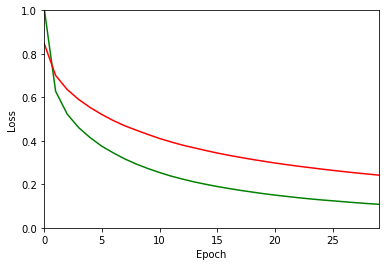

In [ ]:
#plt.plot(H.history["accuracy"], 'b') #azul
#plt.plot(H.history['val_accuracy'], 'orange') #laranja
plt.plot(H.history['loss'], 'g') #verde
plt.plot(H.history['val_loss'], 'r') #vermelho
#plt.title("Model history")
#plt.ylabel("Accuracy")
plt.ylabel("Loss")
plt.xlabel("Epoch")

plt.xlim(0, 29)
plt.ylim(0, 1)

plt.savefig(f"/content/drive/My Drive/Fibras/Resultados/ResNet-50/resnet-graph-loss.png", dpi = 300)
plt.show()

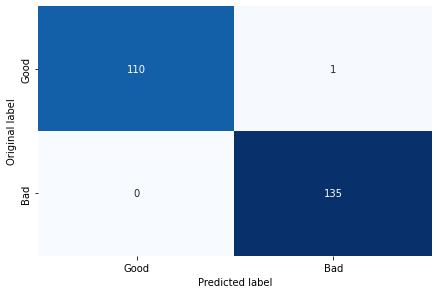

In [ ]:
y_true = train_generator.classes
y_pred = model_resnet50.predict(train_generator, train_generator.samples)
indexes = np.argmax(y_pred, axis = -1)
y_pred = y_pred[np.arange(y_pred.shape[0]), indexes]

fiber_classes = ['Good', 'Bad']

condition_1 = (y_true == 0)
condition_2 = (y_true == 1)
condition_3 = (y_pred <= 0.5)
condition_4 = (y_pred > 0.5)

condition = np.where(condition_1 & condition_3)
arr = [x for xs in condition for x in xs]
a11_resnet50 = len(arr)

condition = np.where(condition_1 & condition_4)
arr = [x for xs in condition for x in xs]
a12_resnet50 = len(arr)

condition = np.where(condition_2 & condition_3)
arr = [x for xs in condition for x in xs]
a21_resnet50 = len(arr)

condition = np.where(condition_2 & condition_4)
arr = [x for xs in condition for x in xs]
a22_resnet50 = len(arr)

resnet50_matrix = [[a11_resnet50, a12_resnet50], [a21_resnet50, a22_resnet50]]

df_resnet50 = pd.DataFrame(resnet50_matrix, index = fiber_classes, columns = fiber_classes)

sns.heatmap(df_resnet50, annot = True, cmap = plt.cm.Blues, cbar = 0, fmt = ".3g")
plt.tight_layout()
plt.ylabel('Original label')
plt.xlabel('Predicted label')

plt.savefig(f"/content/drive/My Drive/Fibras/Resultados/ResNet-50/resnet50-matrix-train.png", dpi = 300, bbox_inches = 'tight')
plt.show()

Testing outputs from test data

Ruim


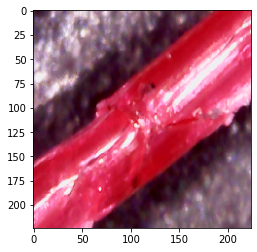

In [ ]:
img = image.load_img("/content/drive/My Drive/Fibras/All/Ruins/fibra (290).png", target_size = (224, 224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
output = model_resnet50.predict(img)
if output < 0.5:
    print("Boa")
else:
    print("Ruim")

# ResNet-18 (PyTorch)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
from matplotlib.image import imread
import os
import time
import copy
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
from tqdm import tqdm
from PIL import Image
from google.colab import files

In [ ]:
data_transforms = {
    'Training': transforms.Compose([
        transforms.RandomResizedCrop(224, scale=(0.96, 1.0), ratio=(0.95, 1.05)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'Validation': transforms.Compose([
        transforms.Resize([224,224]),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'Testing': transforms.Compose([
        transforms.Resize([224,224]),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'All': transforms.Compose([
        transforms.Resize([224,224]),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

batch_size = 64
data_dir = '/content/drive/MyDrive/Fibras/'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x]) for x in ['Training', 'Validation', 'Testing', 'All']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,shuffle=True, num_workers=4) for x in ['Training', 'Validation', 'Testing', 'All']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['Training', 'Validation', 'Testing', 'All']}
class_names = image_datasets['Training'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(class_names)
print(f'Train image size: {dataset_sizes["Training"]}')
print(f'Validation image size: {dataset_sizes["Validation"]}')
print(f'Testing image size: {dataset_sizes["Testing"]}')
print(f'All image size: {dataset_sizes["All"]}')

train_dataloader = torch.utils.data.DataLoader(image_datasets['Training'],batch_size = batch_size, shuffle = True)
val_dataloader = torch.utils.data.DataLoader(image_datasets['Validation'],batch_size = batch_size, shuffle = True)
test_dataloader = torch.utils.data.DataLoader(image_datasets['Testing'],batch_size = batch_size, shuffle = True)
all_dataloader = torch.utils.data.DataLoader(image_datasets['All'],batch_size = batch_size, shuffle = True)

In [ ]:
model_ft = models.resnet18(pretrained = False)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr = 0.001, momentum = 0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size = 7, gamma = 0.1)

train_losses = []
train_accu = []
eval_losses = []
eval_accu = []

In [ ]:
def train(epoch):
  print('\nEpoch : %d'%epoch)
   
  model_ft.train()
 
  running_loss = 0
  correct = 0
  total = 0
 
  for data in tqdm(train_dataloader):
     
    inputs, labels = data[0].to(device), data[1].to(device)
     
    optimizer_ft.zero_grad()
    outputs = model_ft(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer_ft.step()
 
    running_loss += loss.item()
     
    _, predicted = outputs.max(1)
    total += labels.size(0)
    correct += predicted.eq(labels).sum().item()
       
  train_loss = running_loss/len(train_dataloader)
  accu = correct/total
   
  train_accu.append(accu)
  train_losses.append(train_loss)
  print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss, accu))

In [ ]:
def val(epoch):
  model_ft.eval()
 
  running_loss = 0
  correct = 0
  total = 0
 
  with torch.no_grad():
    for data in tqdm(val_dataloader):
      images, labels = data[0].to(device), data[1].to(device)
       
      outputs = model_ft(images)
 
      loss = criterion(outputs, labels)
      running_loss += loss.item()
       
      _, predicted = outputs.max(1)
      total += labels.size(0)
      correct += predicted.eq(labels).sum().item()
   
  test_loss = running_loss/len(val_dataloader)
  accu = correct/total
 
  eval_losses.append(test_loss)
  eval_accu.append(accu)
 
  print('Test Loss: %.3f | Accuracy: %.3f'%(test_loss,accu))

In [ ]:
epochs = 30
for epoch in range(1, epochs+1): 
  train(epoch)
  val(epoch)

Save or load existing model

In [ ]:
# Save model
torch.save(model_ft, '/content/drive/My Drive/Fibras/ResNet/model_resnet.pt')

In [ ]:
# Load model
model_ft = torch.load('/content/drive/My Drive/Fibras/ResNet/model_resnet.pt')

Model Training History & Confusion Matrix

In [ ]:
plt.plot(train_accu, 'b') #azul
plt.plot(eval_accu, 'orange') #laranja
plt.plot(train_losses, 'g') #verde
plt.plot(eval_losses, 'r') #vermelho
plt.xlabel('Época')
plt.ylabel('Precisão/Perda')
plt.title('História do modelo')

plt.xlim(0, 29)
plt.ylim(0, 1)

#plt.savefig(f"/content/drive/My Drive/Fibras/resnet-graph.png", dpi = 300)
plt.show()

In [ ]:
nb_classes = 2
fiber_classes = ['Boas', 'Ruins']

con_mat_resnet = torch.zeros(nb_classes, nb_classes)

with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders['Testing']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                con_mat_resnet[t.long(), p.long()] += 1

a11_resnet = int(con_mat_resnet[0,0].item())
a12_resnet = int(con_mat_resnet[0,1].item())
a21_resnet = int(con_mat_resnet[1,0].item())
a22_resnet = int(con_mat_resnet[1,1].item())

resnet_matrix = [[a11_resnet, a12_resnet], [a21_resnet, a22_resnet]]

df_resnet = pd.DataFrame(resnet_matrix, index = fiber_classes, columns = fiber_classes)

sns.heatmap(df_resnet, annot = True, cmap = plt.cm.Blues, cbar = 0, fmt = ".3g")
plt.tight_layout()
plt.ylabel('Rótulo original')
plt.xlabel('Rótulo previsto')

#plt.savefig(f"/content/drive/My Drive/Fibras/resnet-matrix.png", dpi = 300, bbox_inches='tight')
plt.show()

Testing outputs from test data

In [ ]:
def process_image(image_path):

    image = image_path
    # Resize
    img = image.resize((256, 256))

    # Center crop
    width = 256
    height = 256
    new_width = 224
    new_height = 224

    left = (width - new_width) / 2
    top = (height - new_height) / 2
    right = (width + new_width) / 2
    bottom = (height + new_height) / 2
    img = img.crop((left, top, right, bottom))

    # Convert to numpy, transpose color dimension and normalize
    img = np.array(img).transpose((2, 0, 1)) / 256

    # Standardization
    means = np.array([0.485, 0.456, 0.406]).reshape((3, 1, 1))
    stds = np.array([0.229, 0.224, 0.225]).reshape((3, 1, 1))

    img = img - means
    img = img / stds

    img_tensor = torch.Tensor(img)

    return img_tensor

In [ ]:
from io import BytesIO
uploaded = files.upload()
im = Image.open(BytesIO(uploaded[list(uploaded.keys())[0]]))
img_tensor = process_image(im)
img_tensor = img_tensor.view(1,3,224,224).cuda()
prediction = model_ft(img_tensor.to(device))
print("-------------------------------------")
print("Prediction of Category:",class_names[prediction.argmax()])
print("Probability is:",round(torch.nn.functional.softmax(prediction,dim=1).max().item()*100,2),"%")
print("-------------------------------------")